Student ID 25000148967

GitHub Repository Link https://github.com/robwhite-lis/Everything_Counts_Assessment_1

This is a Notebook about 2 of the UKs favourite topics, trains being late and the weather!

The dataset in question is available is the grandiosely named 

"Table 3138 - Train punctuality at recorded station stops by operator (periodic)"

and is available at https://dataportal.orr.gov.uk/statistics/performance/passenger-rail-performance/table-3138-train-punctuality-at-recorded-station-stops-by-operator-periodic/



In [86]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/robwhite-lis/Everything_Counts_Assessment_1/refs/heads/main/Train_punctuality.csv'
url_content = requests.get(df_url, verify = False).content
df_trains = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [87]:
df_trains.describe()

,Number of recorded station stops,MAT Number of recorded station stops
count,3.940000e+03,3.940000e+03
mean,6.474878e+05,8.026629e+06
std,1.394560e+06,1.753747e+07
min,0.000000e+00,6.600000e+01
25%,5.639950e+04,6.938212e+05
50%,2.288885e+05,2.574194e+06
75%,5.195705e+05,6.623621e+06
max,7.012797e+06,8.441222e+07


Train arrivals are monitored in a fairly strange way across periods, which roughly equate to months, but not quite, as there are 13 of them in a year. (They are actually 28 days each). Also the year runs from April to March!

In [88]:
df_trains.head()

,Time Period,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,...,On time within 59 seconds MAA,Time to 3 MAA,Time to 5 MAA,Time to 10 MAA,Time to 15 MAA,Time to 20 MAA,Time to 30 MAA,15 minutes plus MAA,20 minutes plus MAA,30 minutes plus MAA
0,Apr 2014 to Mar 2015 (Period 01),Great Britain,4736697,35.64,68.70,88.43,94.38,98.23,99.17,99.55,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
1,Apr 2014 to Mar 2015 (Period 02),Great Britain,5061146,35.05,67.70,87.50,93.69,97.91,98.98,99.42,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
2,Apr 2014 to Mar 2015 (Period 03),Great Britain,5084203,35.00,67.67,87.43,93.65,97.89,98.99,99.45,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
3,Apr 2014 to Mar 2015 (Period 04),Great Britain,5123892,34.09,66.16,86.44,93.08,97.67,98.87,99.37,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]
4,Apr 2014 to Mar 2015 (Period 05),Great Britain,5131680,32.78,63.95,84.38,91.54,97.03,98.56,99.20,...,[z],[z],[z],[z],[z],[z],[z],[z],[z],[z]


In [89]:
df_trains.dtypes

Time Period                             object
Operator                                object
Number of recorded station stops         int64
Early                                   object
On Time within 59 seconds               object
Time to 3                               object
Time to 5                               object
Time to 10                              object
Time to 15                              object
Time to 20                              object
Time to 30                              object
15 minutes plus                         object
20 minutes plus                         object
30 minutes plus                         object
MAT Number of recorded station stops     int64
Early MAA                               object
On time within 59 seconds MAA           object
Time to 3 MAA                           object
Time to 5 MAA                           object
Time to 10 MAA                          object
Time to 15 MAA                          object
Time to 20 MA

OK so let's clean up the date period into something more useable

In [90]:
df_trains[["Start_Year", "Period"]] = df_trains["Time Period"].str.extract(r'(\d{4}).*Period (\d{2})')

In [91]:
df_trains["Start_Year"] = df_trains["Start_Year"].astype(int)
df_trains["Period"] = df_trains["Period"].astype(int)

In [92]:
df_trains[["Time Period", "Start_Year", "Period"]]

,Time Period,Start_Year,Period
0,Apr 2014 to Mar 2015 (Period 01),2014,1
1,Apr 2014 to Mar 2015 (Period 02),2014,2
2,Apr 2014 to Mar 2015 (Period 03),2014,3
3,Apr 2014 to Mar 2015 (Period 04),2014,4
4,Apr 2014 to Mar 2015 (Period 05),2014,5
...,...,...,...
3935,Apr 2025 to Mar 2026 (Period 03),2025,3
3936,Apr 2025 to Mar 2026 (Period 04),2025,4
3937,Apr 2025 to Mar 2026 (Period 05),2025,5
3938,Apr 2025 to Mar 2026 (Period 06),2025,6


Now let's add a Season column

Bearing in mind that the periods run April to March, and there are 13 of them, I've made the following assingments which roughly translate as

Period 1 - 3 spring (April, May, June)
Period 4 - 6 Summe (July, August, September)r
Period 7 - 9 Autu (October, November, December)mn
Period 10 - 13  Win (January, February, March and a bit of April)ter


In [93]:
bins = [0,3,6,9,13]
labels = ["Spring", "Summer", "Autumn", "Winter"]
df_trains["Season"] = pd.cut(df_trains["Period"], bins=bins, labels=labels)

Train arrivals are monitored in a fairly strange way across periods, which roughly equate to months, but not quite, as there are 13 of them in a year. (They are actually 28 days each). Also the year runs from April to March!

OK so let's clean up the date period into something more useable

Now clean the data into just the fields we need for this analysis.

We'll look at that "On Time", +3 mins, +5 mins and + 10 mins

First let's check the column names

In [94]:
df_trains.columns

Index(['Time Period', 'Operator', 'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30', '15 minutes plus',
       '20 minutes plus', '30 minutes plus',
       'MAT Number of recorded station stops', 'Early MAA',
       'On time within 59 seconds MAA', 'Time to 3 MAA', 'Time to 5 MAA',
       'Time to 10 MAA', 'Time to 15 MAA', 'Time to 20 MAA', 'Time to 30 MAA',
       '15 minutes plus MAA', '20 minutes plus MAA', '30 minutes plus MAA',
       'Start_Year', 'Period', 'Season'],
      dtype='object')

In [95]:
df_trains_clean = df_trains[['Start_Year', 'Period', 'Season', 'Operator', 'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30' ]].copy()

In [96]:
numeric_cols = [
    'Start_Year', 'Period', 'Number of recorded station stops', 'Early',
    'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
    'Time to 15', 'Time to 20', 'Time to 30'
]

df_trains_clean[numeric_cols] = df_trains_clean[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)

In [97]:
df_trains_clean.columns

Index(['Start_Year', 'Period', 'Season', 'Operator',
       'Number of recorded station stops', 'Early',
       'On Time within 59 seconds', 'Time to 3', 'Time to 5', 'Time to 10',
       'Time to 15', 'Time to 20', 'Time to 30'],
      dtype='object')

In [98]:
df_trains_clean.dtypes

Start_Year                             int64
Period                                 int64
Season                              category
Operator                              object
Number of recorded station stops       int64
Early                                float64
On Time within 59 seconds            float64
Time to 3                            float64
Time to 5                            float64
Time to 10                           float64
Time to 15                           float64
Time to 20                           float64
Time to 30                           float64
dtype: object

In [99]:
df_trains_clean

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30
0,2014,1,Spring,Great Britain,4736697,35.64,68.70,88.43,94.38,98.23,99.17,99.55,99.83
1,2014,2,Spring,Great Britain,5061146,35.05,67.70,87.50,93.69,97.91,98.98,99.42,99.77
2,2014,3,Spring,Great Britain,5084203,35.00,67.67,87.43,93.65,97.89,98.99,99.45,99.79
3,2014,4,Summer,Great Britain,5123892,34.09,66.16,86.44,93.08,97.67,98.87,99.37,99.76
4,2014,5,Summer,Great Britain,5131680,32.78,63.95,84.38,91.54,97.03,98.56,99.20,99.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,2025,3,Spring,West Midlands Trains,350795,38.17,67.43,84.06,90.84,96.71,98.34,99.08,99.68
3936,2025,4,Summer,West Midlands Trains,347956,35.55,63.41,80.43,87.68,95.04,97.36,98.43,99.33
3937,2025,5,Summer,West Midlands Trains,345491,38.25,67.13,83.73,90.43,96.18,97.92,98.72,99.48
3938,2025,6,Summer,West Midlands Trains,358760,38.88,68.08,84.93,91.65,97.21,98.66,99.35,99.78


Finally we'll remove the "Great Britain" Operator as that is an aggregator

In [100]:
df_trains_clean = df_trains_clean[df_trains_clean["Operator"] != "Great Britain"]

In [101]:
df_trains_clean["Operator"].unique()

array(['England and Wales', 'Scotland', 'Avanti West Coast', 'c2c',
       'Caledonian Sleeper', 'Chiltern Railways', 'CrossCountry',
       'East Midlands Railway', 'Elizabeth line',
       'Govia Thameslink Railway', 'Grand Central',
       'Great Western Railway', 'Greater Anglia', 'Heathrow Express',
       'Hull Trains', 'London North Eastern Railway', 'London Overground',
       'Lumo', 'Merseyrail', 'Northern Trains', 'ScotRail',
       'South Western Railway', 'Southeastern', 'TfW Rail',
       'TransPennine Express', 'West Midlands Trains'], dtype=object)

In [102]:
df_trains_clean

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30
150,2014,1,Spring,England and Wales,4305016,36.06,68.58,88.07,94.11,98.12,99.11,99.52,99.81
151,2014,2,Spring,England and Wales,4600338,35.42,67.49,87.06,93.35,97.76,98.90,99.37,99.75
152,2014,3,Spring,England and Wales,4623174,35.38,67.56,87.10,93.40,97.77,98.93,99.41,99.78
153,2014,4,Summer,England and Wales,4664354,34.46,66.07,86.14,92.83,97.54,98.80,99.33,99.74
154,2014,5,Summer,England and Wales,4641560,33.79,65.01,85.04,91.91,97.07,98.53,99.17,99.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,2025,3,Spring,West Midlands Trains,350795,38.17,67.43,84.06,90.84,96.71,98.34,99.08,99.68
3936,2025,4,Summer,West Midlands Trains,347956,35.55,63.41,80.43,87.68,95.04,97.36,98.43,99.33
3937,2025,5,Summer,West Midlands Trains,345491,38.25,67.13,83.73,90.43,96.18,97.92,98.72,99.48
3938,2025,6,Summer,West Midlands Trains,358760,38.88,68.08,84.93,91.65,97.21,98.66,99.35,99.78


Let's first look at some overall statistics which operators had the best "On time" record by year

We'll define year as the calendar year the data started in

In [103]:
df_trains_clean.sort_values(by=["Start_Year", "On Time within 59 seconds"], ascending=[True, False])

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30
612,2014,13,Winter,c2c,127182,57.15,88.90,97.80,98.87,99.52,99.81,99.94,99.99
602,2014,3,Spring,c2c,112651,52.90,87.84,97.52,98.91,99.63,99.78,99.92,99.99
605,2014,6,Summer,c2c,113319,54.68,87.64,96.57,97.97,99.02,99.33,99.45,99.73
610,2014,11,Winter,c2c,115587,54.84,87.27,96.91,98.45,99.51,99.83,99.95,99.99
601,2014,2,Spring,c2c,111373,52.96,87.17,97.20,98.80,99.66,99.79,99.89,99.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2025,5,Summer,Avanti West Coast,52813,20.04,39.60,58.87,69.36,82.13,88.20,91.61,95.33
598,2025,6,Summer,Avanti West Coast,54377,19.63,38.98,59.00,69.94,83.17,89.35,93.00,96.88
594,2025,2,Spring,Avanti West Coast,51197,17.59,37.05,56.13,66.64,79.66,86.40,90.30,95.06
599,2025,7,Autumn,Avanti West Coast,56499,17.79,36.92,57.39,68.86,82.00,88.08,91.67,95.62


In [104]:
df_trains_clean[df_trains_clean["Operator"].str.lower() == "c2c"]

,Start_Year,Period,Season,Operator,Number of recorded station stops,Early,On Time within 59 seconds,Time to 3,Time to 5,Time to 10,Time to 15,Time to 20,Time to 30
600,2014,1,Spring,c2c,102320,52.32,85.66,95.04,97.00,98.54,99.15,99.67,99.93
601,2014,2,Spring,c2c,111373,52.96,87.17,97.20,98.80,99.66,99.79,99.89,99.95
602,2014,3,Spring,c2c,112651,52.90,87.84,97.52,98.91,99.63,99.78,99.92,99.99
603,2014,4,Summer,c2c,116852,49.82,84.93,96.95,98.74,99.69,99.90,99.96,99.97
604,2014,5,Summer,c2c,116151,52.12,86.14,96.49,98.16,99.26,99.62,99.75,99.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2025,3,Spring,c2c,123228,50.70,81.84,94.41,97.43,99.28,99.69,99.84,99.96
746,2025,4,Summer,c2c,124638,46.58,78.37,92.52,96.67,99.20,99.74,99.85,99.99
747,2025,5,Summer,c2c,122201,45.42,76.49,91.69,95.90,98.44,99.05,99.41,99.66
748,2025,6,Summer,c2c,121468,37.20,67.55,87.51,94.81,99.08,99.75,99.91,99.98


In [105]:
(
 df_trains_clean.groupby(["Start_Year", "Operator"], as_index=False)
 .agg(sum_ontime=("On Time within 59 seconds", "sum"))
 .sort_values(["Start_Year", "sum_ontime"], ascending=[True, False])
)

,Start_Year,Operator,sum_ontime
24,2014,c2c,1122.87
11,2014,Heathrow Express,1047.86
2,2014,Chiltern Railways,979.65
15,2014,Merseyrail,926.62
19,2014,South Western Railway,912.52
...,...,...,...
291,2025,Hull Trains,349.55
302,2025,TransPennine Express,343.78
282,2025,CrossCountry,337.89
287,2025,Grand Central,328.13


Let's create a df for that now so we can plot easily

In [106]:
df_trains_year = (
 df_trains_clean.groupby(["Start_Year", "Operator"], as_index=False)
 .agg(sum_ontime=("On Time within 59 seconds", "sum"))
 .sort_values(["Start_Year", "sum_ontime"], ascending=[True, False])
)

In [107]:
df_trains_year.dtypes

Start_Year      int64
Operator       object
sum_ontime    float64
dtype: object

In [109]:
plot_data = df_trains_year["Start_Year"]

Now let's draw a graph

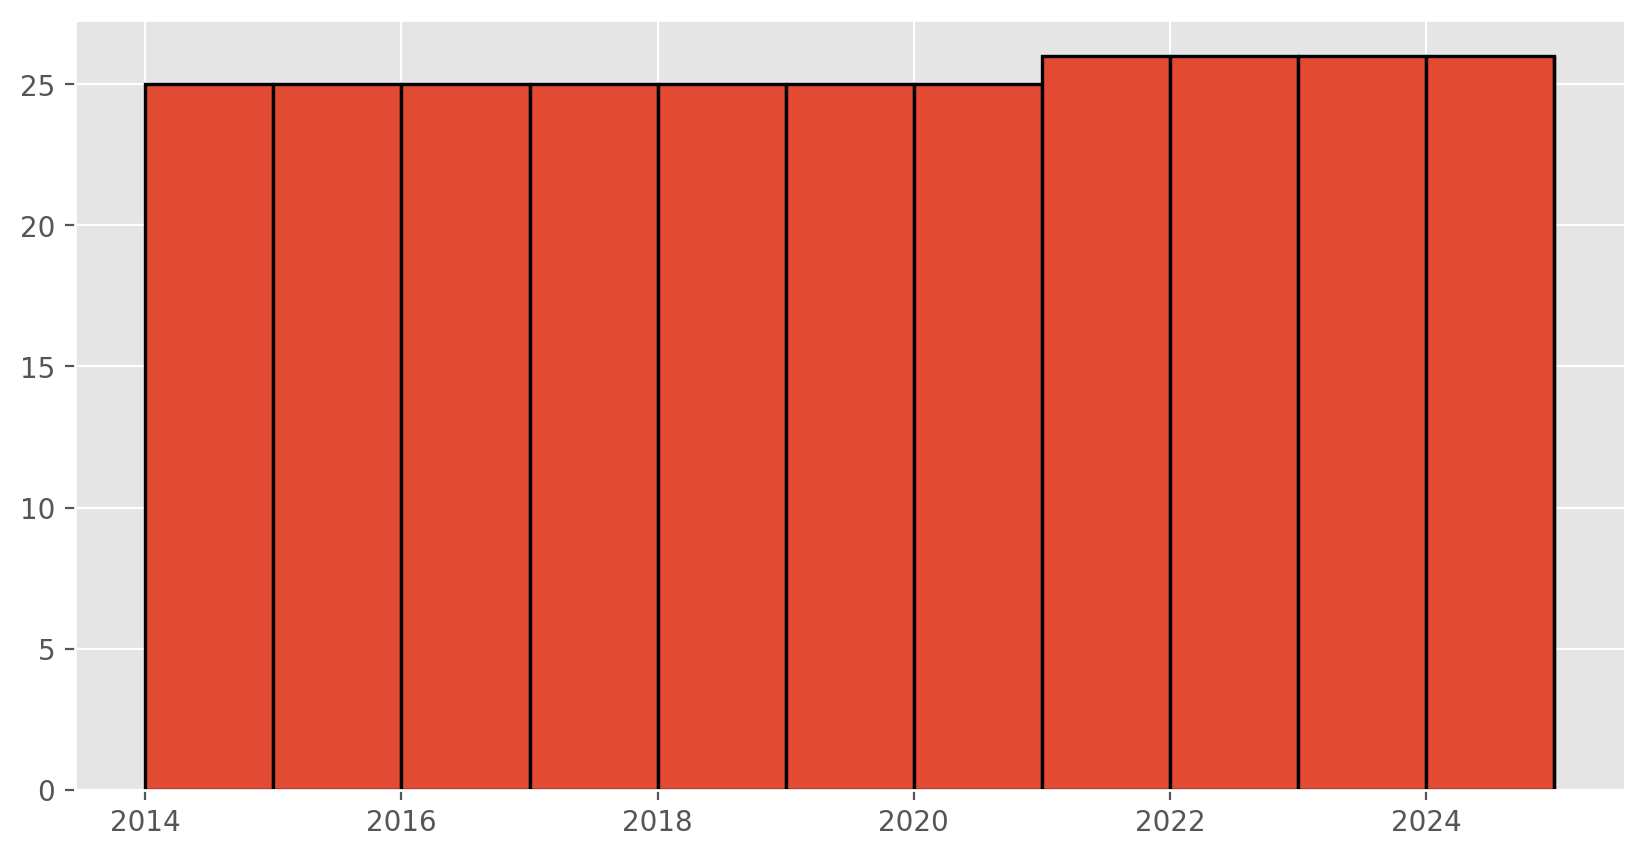

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(plot_data, bins = plot_data, edgecolor = 'black', linewidth = 1.2)
plt.show();